In [ ]:
############################# - Notes for use to avoid confusion :)


#Not all cells work together. For example if you run the cell that deals with missing values by removing the entire row
#or removing all columns you will not be able to use the method to predict null values because the entries will be gone.

#So in order to predict the missing values after using the code cells that remove them you simply have to first run the code cell
#which reads the original data again

#############################

In [48]:
#missing values have value ? all for attribute 11

#either edible, poisonous or unknown. Unknowm and poisonous grouped together

#to deal with missing values use 'classifier' or 'regressor' based on values that arent missing to predict missing values in
#preprocessing. Be careful that vlaues using to predict arent overfitted. Compare to other methods such as removing entire attribute
#or giving deafult/mean value

from sklearn import metrics
from sklearn import model_selection
from sklearn import ensemble
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

import umap.umap_ as umap

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
# read contents of data file
file = pd.read_csv("agaricus-lepiota.data")
  
# create list to be used as headers
features = ['edibility', 'capShape', 'capSurface', 'capColor', 'bruises', 'odor', 
            'gillAttachment', 'gillSpacing', 'gillSize', 'gillColor', 
            'stalkShape', 'stalkRoot', 'stalkSurfaceAboveRing', 'stalkSurfaceBelowRing', 
            'stalkColorAboveRing', 'stalkColorBelowRing', 'veilType', 'veilColor', 
            'ringNumber', 'ringType', 'sporePrintColor', 'population', 'habitat']

#convert '?' to NaN
file.replace({'?': np.nan}, inplace=True)

# converting data frame to csv
file.to_csv("agaricus-lepiota.csv", header=features, index=False)

data = pd.read_csv("agaricus-lepiota.csv")

#result = data.head(10)
#print(data)
#print(result)

In [33]:
#removes column with missing values which in our data is only stalkRoot
#one way to deal with missing values
print(data.shape)

data = data.drop('stalkRoot', axis = 1)

print(data.shape)

data.to_csv("agaricus-lepiota-no-stalkRoot.csv")

print(data.head(10))

(8123, 23)
(8123, 22)
  edibility capShape capSurface capColor bruises odor gillAttachment  \
0         e        x          s        y       t    a              f   
1         e        b          s        w       t    l              f   
2         p        x          y        w       t    p              f   
3         e        x          s        g       f    n              f   
4         e        x          y        y       t    a              f   
5         e        b          s        w       t    a              f   
6         e        b          y        w       t    l              f   
7         p        x          y        w       t    p              f   
8         e        b          s        y       t    a              f   
9         e        x          y        y       t    l              f   

  gillSpacing gillSize gillColor  ... stalkSurfaceBelowRing  \
0           c        b         k  ...                     s   
1           c        b         n  ...                     s

In [50]:
#removes all rows that have missing values
print(data.shape)

data = data.dropna(axis = 0).reset_index(drop=True)
 
#shows we lose alot of data as 2480 rows lost
#bad way of handling missing values
print(data.shape)

data.to_csv("agaricus-lepiota-NaN-removed.csv")

(8123, 23)
(5643, 23)


In [52]:
#use label encoding on all featres that are categorical
#OneHot encoding not applicable as there are a high number of categories
le = LabelEncoder()

data['edibility'] = le.fit_transform(data['edibility'])
data['capShape'] = le.fit_transform(data['capShape'])
data['capSurface'] = le.fit_transform(data['capSurface'])
data['capColor'] = le.fit_transform(data['capColor'])
data['bruises'] = le.fit_transform(data['bruises'])
data['odor'] = le.fit_transform(data['odor'])
data['gillAttachment'] = le.fit_transform(data['gillAttachment'])
data['gillSpacing'] = le.fit_transform(data['gillSpacing'])
data['gillSize'] = le.fit_transform(data['gillSize'])
data['gillColor'] = le.fit_transform(data['gillColor'])
data['stalkShape'] = le.fit_transform(data['stalkShape'])
data['stalkRoot'] = le.fit_transform(data['stalkRoot'])
data['stalkSurfaceAboveRing'] = le.fit_transform(data['stalkSurfaceAboveRing'])
data['stalkSurfaceBelowRing'] = le.fit_transform(data['stalkSurfaceBelowRing'])
data['stalkColorAboveRing'] = le.fit_transform(data['stalkColorAboveRing'])
data['stalkColorBelowRing'] = le.fit_transform(data['stalkColorBelowRing'])
data['veilType'] = le.fit_transform(data['veilType'])
data['veilColor'] = le.fit_transform(data['veilColor'])
data['ringNumber'] = le.fit_transform(data['ringNumber'])
data['ringType'] = le.fit_transform(data['ringType'])
data['sporePrintColor'] = le.fit_transform(data['sporePrintColor'])
data['population'] = le.fit_transform(data['population'])
data['habitat'] = le.fit_transform(data['habitat'])

data.to_csv("agaricus-lepiota-encoded.csv")

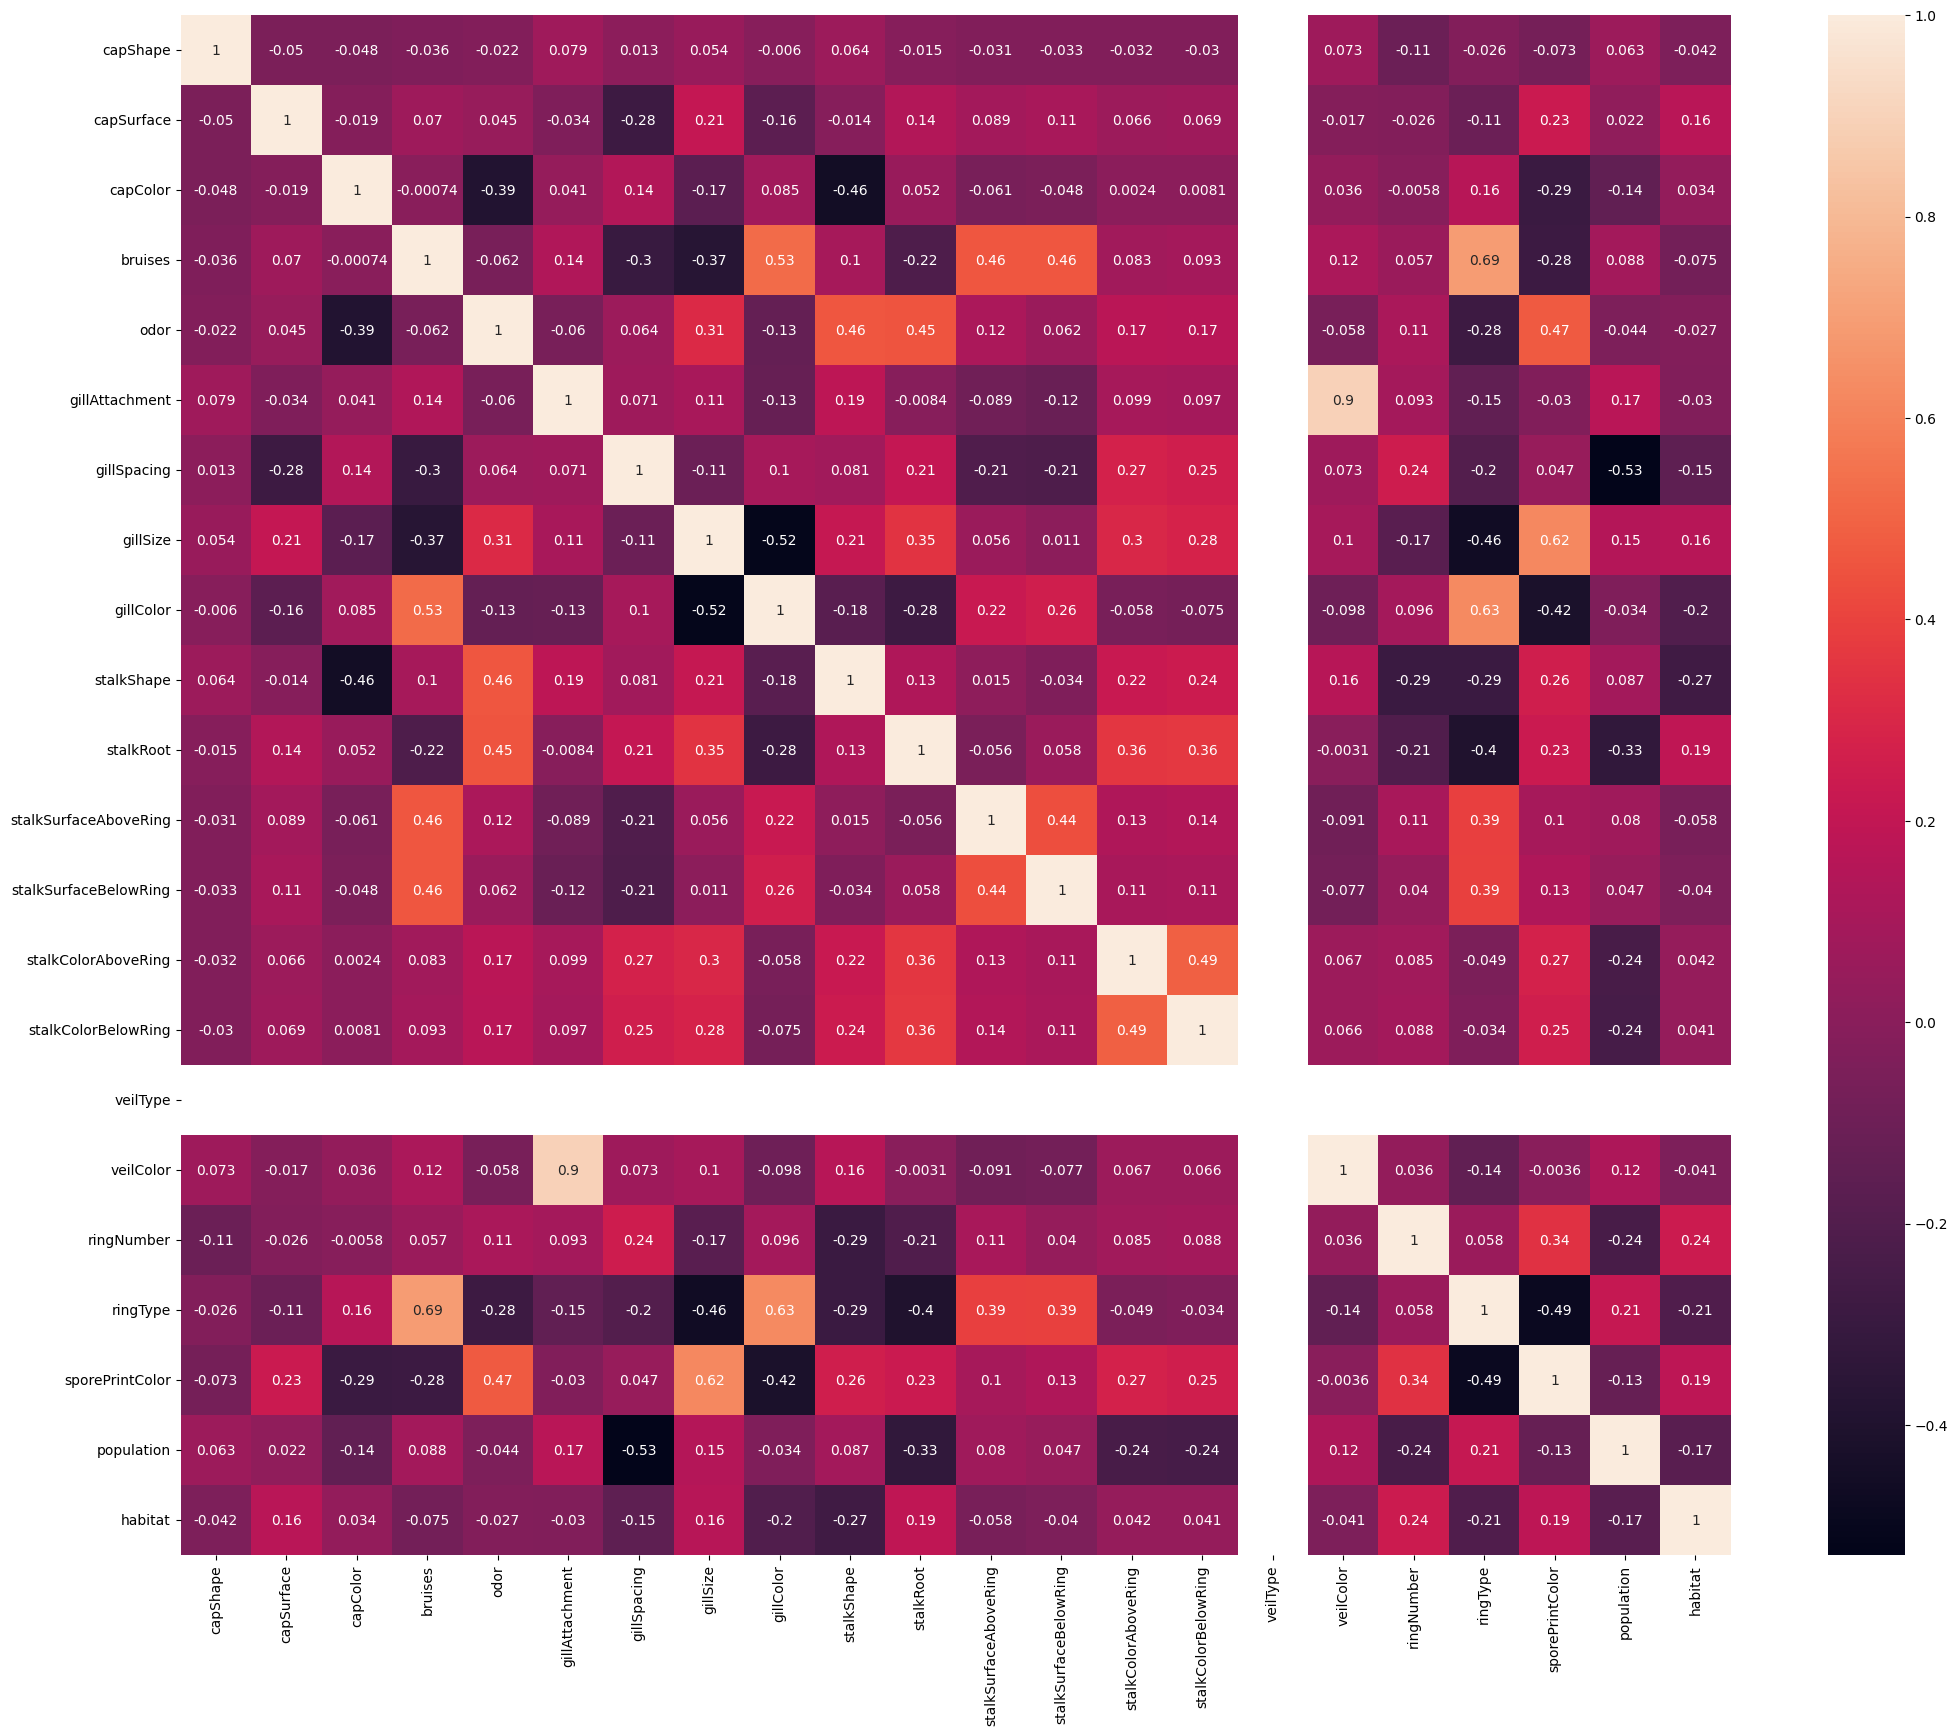

In [53]:
#predict missing values for stalkRoot
train_data = data[data['stalkRoot']!= 4].copy()
test_data = data[data['stalkRoot'] == 4].copy()

X_train = train_data.drop('stalkRoot', axis = 1)
y_train = train_data['stalkRoot']

X_test = test_data.drop('stalkRoot', axis = 1)

rfc = RandomForestRegressor()

rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

rounded_data = (np.rint(y_pred)).astype(int)
test_data['stalkRoot'] = rounded_data

test_data.to_csv("predicted-missing-values.csv")

frames = [train_data, test_data]
treated_data = pd.concat(frames)

X = treated_data.drop('edibility', axis = 1)
y = treated_data['edibility']

data_scaled = StandardScaler().fit_transform(X)

treated_data.to_csv("full-data.csv")


fig = plt.figure(figsize=(25, 20))
sns.heatmap(X.corr(), annot=True)
plt.savefig("Heatmap.png")

#as you can see from heatmap there are some fearutes with high correlation

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1754: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


                  feature         VIF
0                capShape    5.456229
1              capSurface    3.948445
2                capColor    6.071123
3                 bruises    7.569400
4                    odor   14.245227
5          gillAttachment  256.503432
6             gillSpacing    3.560098
7                gillSize    5.441739
8               gillColor    6.438933
9              stalkShape    8.739999
10              stalkRoot    5.148665
11  stalkSurfaceAboveRing   11.619352
12  stalkSurfaceBelowRing   11.690013
13    stalkColorAboveRing   17.539829
14    stalkColorBelowRing   17.801283
15               veilType         NaN
16              veilColor  274.331514
17             ringNumber   62.627795
18               ringType   13.622071
19        sporePrintColor   15.343782
20             population   21.818449
21                habitat    2.752261


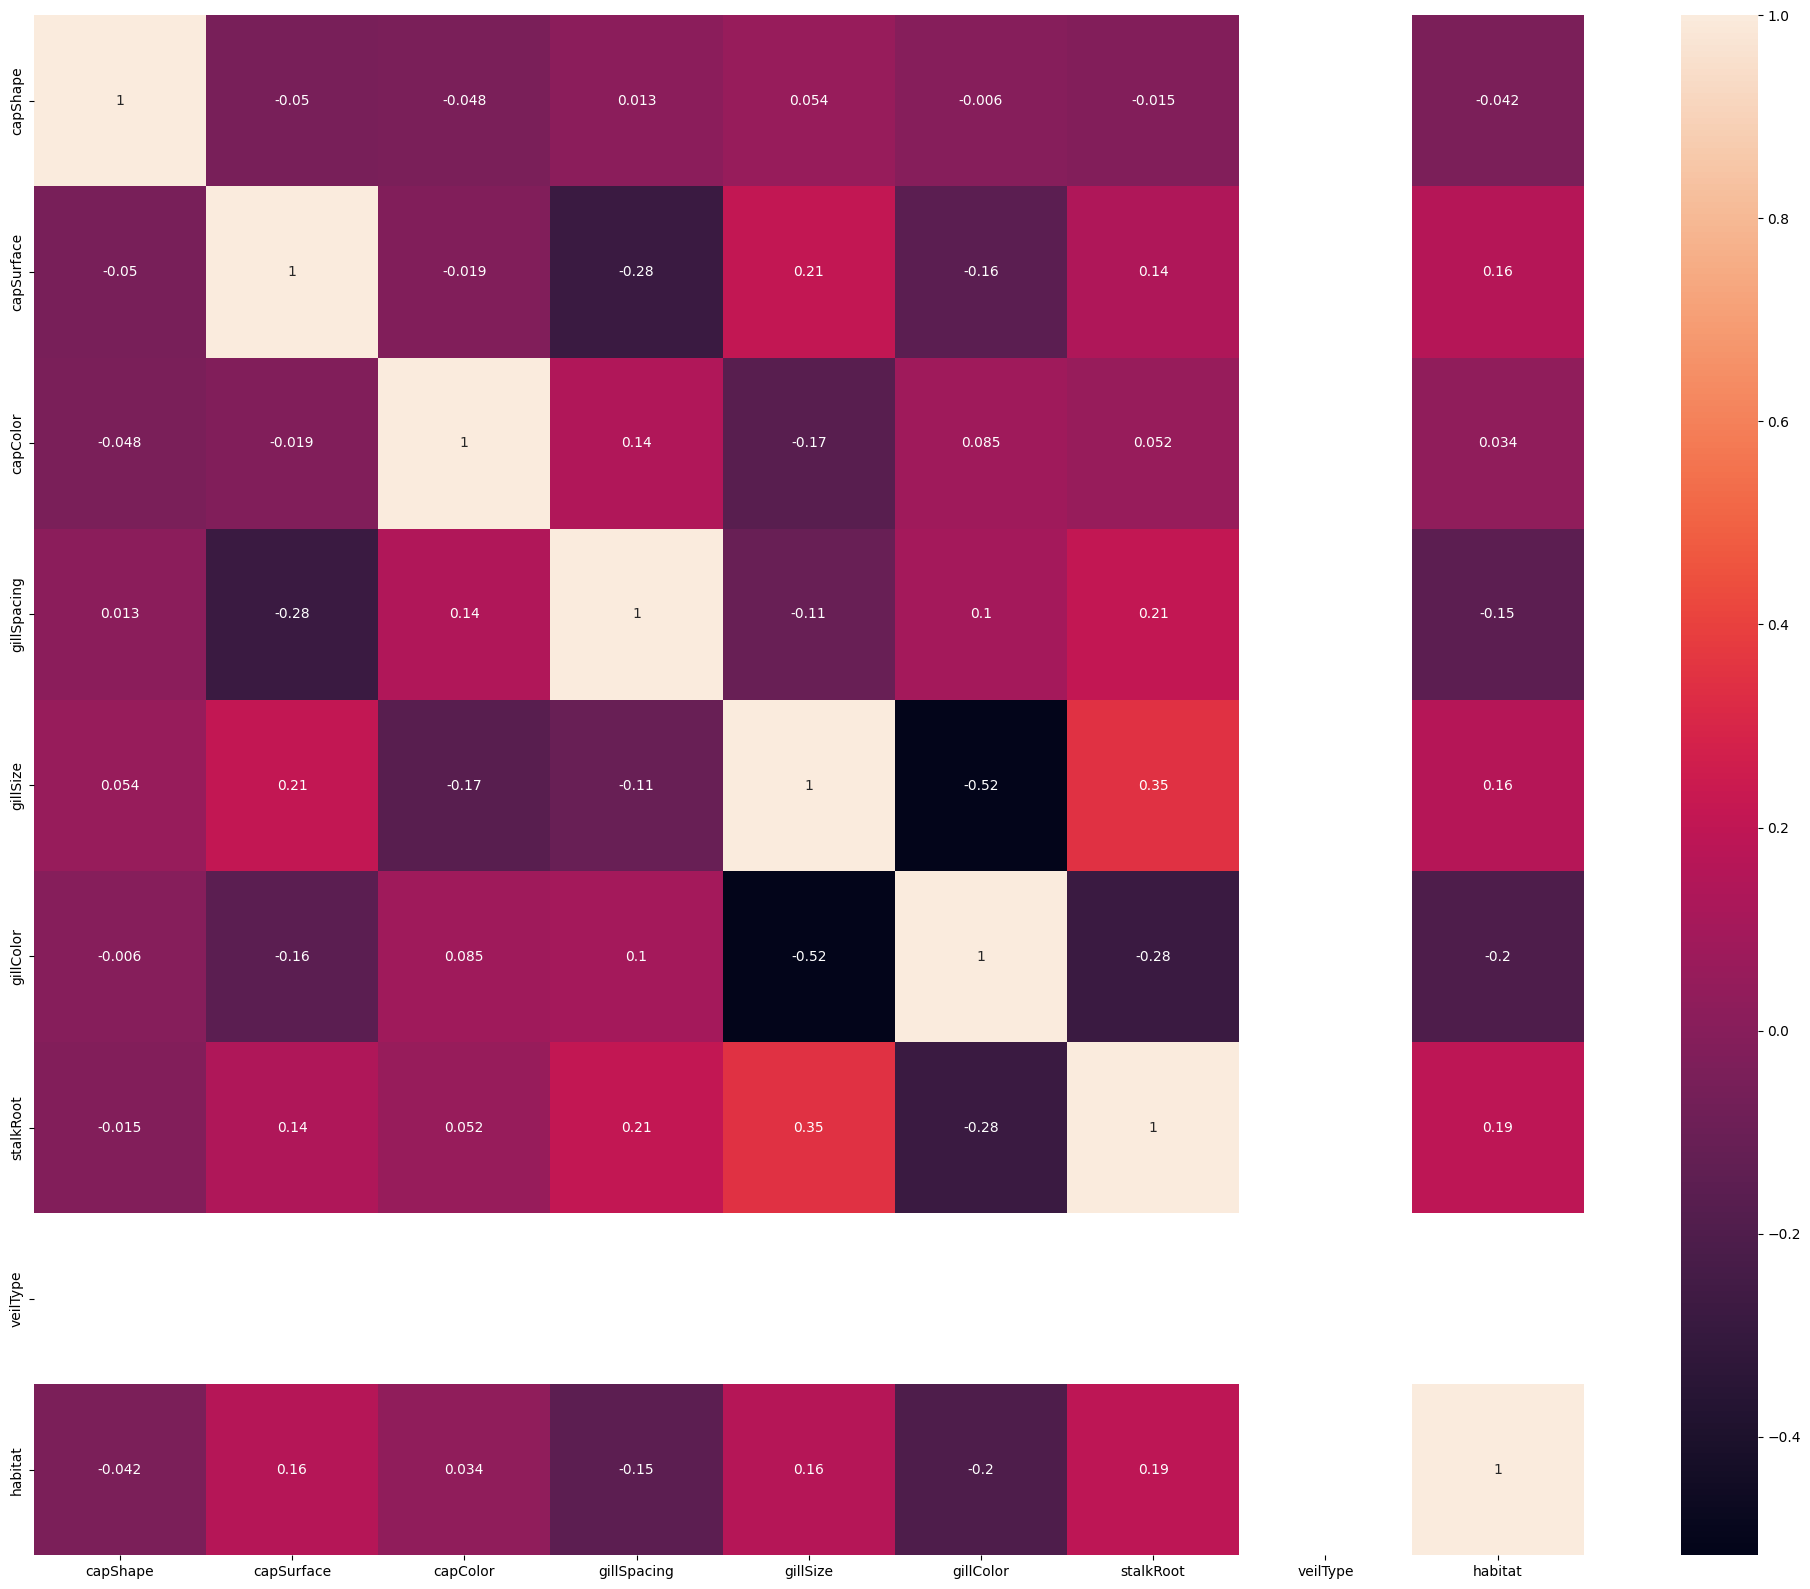

In [54]:
#variance inflation factor

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
						for i in range(len(X.columns))]

#unsure exactly why veilType is Nan. From quick search i think its so close to zero it goes to Null.
print(vif_data)

features_to_drop = []

for i in range(len(X.columns)):
	if vif_data["VIF"][i] > 7:
		drop = vif_data["feature"][i]
		features_to_drop.append(drop)

new_X = X.drop(features_to_drop, axis = 1)
		
#generally features with VIF > 5 get removed but we can experiment with slightly higher i.e > 7


fig2 = plt.figure(figsize=(25, 20))
sns.heatmap(new_X.corr(), annot=True)
plt.savefig("Heatmap2.png")

#as seen by second heatmap these have mich less colinearality

[19.  12.3 10.7 10.   8.1  6.7  4.7  4.5  3.8  3.6  2.9  2.7  2.4  2.1
  1.9  1.4  1.1  0.7  0.6  0.4  0.3  0. ]


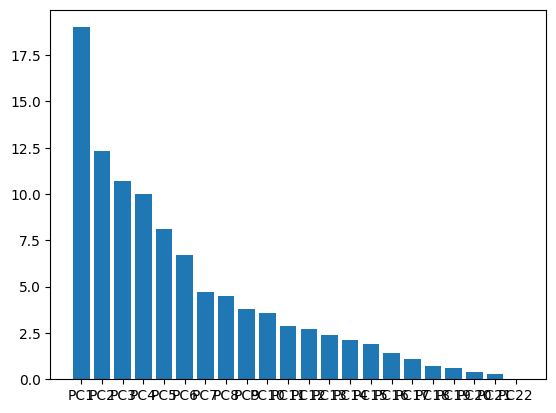

         pca_1     pca_2  label
0    -1.695511 -0.380972      0
1    -1.256226 -0.969427      0
2     0.188353 -1.535155      1
3     1.979517 -0.242445      0
4    -1.868758 -0.457702      0
...        ...       ...    ...
8118 -2.022424 -0.489409      0
8119 -3.189688 -0.398053      0
8120 -1.442855 -0.246081      0
8121  3.684614 -0.853562      1
8122 -1.418134 -0.762595      0

[8123 rows x 3 columns]


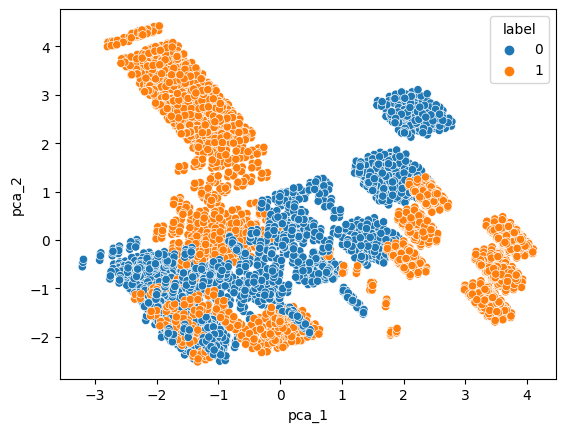

In [55]:
#data visualisation pca
#a linear method so less complex than tsne thus takes much less time
#not very useful to visualise our dataset I dont think as shown by the explained variance and scree plot
pca = PCA()
pca_features = pca.fit_transform(data_scaled)

per_var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
print(per_var)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

#to be seen on a 2D-plot we can only use PC1 and PC2 which gives us the highest explained variance but still very low
#around 19% + 12% = 31% explained variance which is bad
plt.bar(x= range(1,len(per_var)+1), height = per_var, tick_label = labels)
plt.show()

pca_df = pd.DataFrame({'pca_1': pca_features[:,0], 'pca_2': pca_features[:,1], 'label': treated_data['edibility']})
print(pca_df)

sns.scatterplot(x = 'pca_1', y = 'pca_2', hue = 'label', data = pca_df)

plt.show()

#PCA could be useful to reduce multicolinearality though instead of data visualisation
#use the first 8 pc's to get about ~90% explained variance, 9 to get ~93%, 10 to get ~95%

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


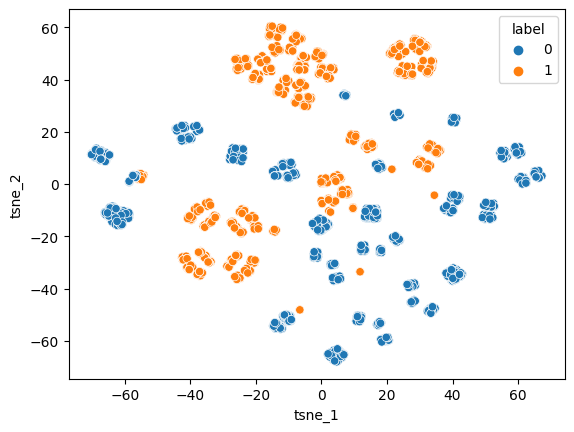

In [56]:
#data visualisation t-sne
#unlike pca its not linear so much more complex and better for our data I think
#result of t-sne greatly affected by 'perplexity' hyperparameter
#try perplexity values in the range 5-100 default is 30. Higher perplexity takes longer but may be better
n_components = 2
tsne = TSNE(n_components, perplexity=100)
tsne_features = tsne.fit_transform(data_scaled)

tsne_df = pd.DataFrame({'tsne_1': tsne_features[:,0], 'tsne_2': tsne_features[:,1], 'label': treated_data['edibility']})

sns.scatterplot(x = 'tsne_1', y = 'tsne_2', hue = 'label', data = tsne_df)

plt.show()

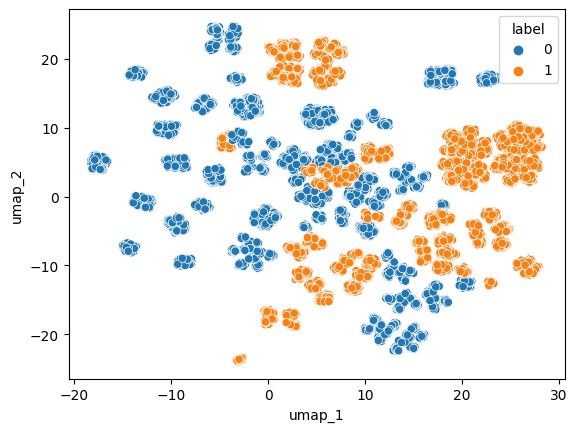

In [57]:
#data visualisation UMAP
#UMAP works very similarly to tsne but get more efficient for higher volumes of data
#result greatly affected by n_neighbors and min_dist hyperparameters
#for n_neighbors try range 5-100 and min_dist 0.1-1
fit = umap.UMAP(
    n_neighbors=100,
    min_dist=1,
    n_components=2,
    metric = 'correlation'
)

umap_features = fit.fit_transform(data_scaled)

umap_df = pd.DataFrame({'umap_1': umap_features[:,0], 'umap_2': umap_features[:,1], 'label': treated_data['edibility']})

sns.scatterplot(x = 'umap_1', y = 'umap_2', hue = 'label', data = umap_df)

plt.show()